     pcost       dcost       gap    pres   dres
 0: -1.9348e+00 -1.9350e+00  2e-04  0e+00  7e-01
 1: -1.9348e+00 -1.9348e+00  2e-06  1e-19  7e-03
 2: -1.9348e+00 -1.9348e+00  2e-08  1e-19  2e-04
 3: -1.9348e+00 -1.9348e+00  5e-10  1e-19  1e-05
 4: -1.9348e+00 -1.9348e+00  6e-12  1e-19  8e-08
Optimal solution found.
   Global Equities  DM Equities
0         0.002926     0.005525
Assetit European Equities Global Equities
Assetit EM Equities European Equities
Results
Optimal dual variable values:  [ 1.19608340e+03  8.16961028e+00 -9.38559158e-01  3.61656034e+01
 -8.83789437e+00]
Jacobian matrix at optimum [-0.004761   -0.4033505  -0.39924672  0.01759662 -0.47671203]

-- MEAN VALUES (pre/post) --
Global Equities    6.803574
DM Equities        6.835148
EM Equities        9.950194
dtype: float64
Global Equities   -36.646727
DM Equities       -36.161357
EM Equities       -37.331821
dtype: float64

-- VOLATILITY (pre/post) --
Global Equities    21.319891
DM Equities        21.593033
EM Equitie

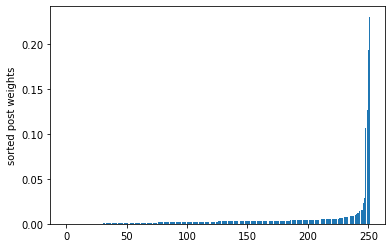

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import entropy_pooling as ep
data = ep.views.load()
(A,b,C,d) = data
#print(A,b)
scenarios = pd.read_excel("data.xlsx")
sample = scenarios[['Global Equities','DM Equities','EM Equities']]

def weighted_mean(x, w):
    """Weighted Mean"""
    #print((x).size)
    #print((w).size)
    return np.sum(np.array(x) * np.array(w)) / np.sum(w)

def weighted_std(values, weights):
    average = np.average(values, axis=0, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, axis=0, weights=weights)
    res = np.sqrt(variance)
    return pd.DataFrame([res], columns=values.columns).mean() # mean just to format the rows to one

def weighted_cov(x, y, w):
    return np.sum(w * np.array(x - weighted_mean(x, w)) * np.array(y - weighted_mean(y, w))) / np.sum(w)

def weighted_corr(x, y, w):
    return weighted_cov(x, y, w) / np.sqrt(weighted_cov(x, x, w) * weighted_cov(y, y, w))

def print_means(scenarios, weights):
    means = sample.multiply(weights,axis=0).sum()
    print(((1+means/100)**12-1)*100) # out in precentages 0.06 => 6 %

def print_vols(scenarios, weights):
    print(weighted_std(sample, post) * np.sqrt(12)) # out in precentages 0.06 => 6 %

m,n = scenarios.shape
pre = np.ones((1,m)).T/m
post = ep.entropy_minimizer.full_confidence_posterior(pre, A, b, C, d)
# Annualized
print('\n-- MEAN VALUES (pre/post) --')
print_means(sample, pre)
print_means(sample, post)
print('\n-- VOLATILITY (pre/post) --')
print_vols(sample, pre)
print_vols(sample, post)
print('\n-- CORRELATION (pre/post) --')
print(weighted_corr(sample['Global Equities'], sample['EM Equities'], pre))
print(weighted_corr(sample['Global Equities'], sample['EM Equities'], post))
plt.bar(range(len(post)),np.sort(post))
plt.ylabel('sorted post weights')
plt.show()